In [2]:
import math
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
import seaborn as sns
import imageio
import time
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")
import keras
from keras.datasets import mnist
from keras.layers import Input,Dense,Flatten,MaxPooling2D,MaxPooling1D,Conv2D,Reshape
from keras.models import Model,Sequential

#data processing
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

#### Using Keras 

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
X_train = np.expand_dims(X_train/np.max(X_train),-1)
X_test = np.expand_dims(X_test/np.max(X_test),-1)

In [4]:
train_labels = LabelEncoder().fit_transform(y_train)
test_labels = LabelEncoder().fit_transform(y_test)
train_labels = train_labels.reshape(-1)
test_labels = test_labels.reshape(-1)

In [5]:
input_shape = X_train[0].shape

def build_network(initializer):
    model = Sequential()
    model.add(Reshape(input_shape,input_shape=(28,28,1)))
    model.add(Conv2D(32,kernel_size = (3,3),activation="relu",kernel_initializer = initializer))
    model.add(Conv2D(64,(3,3),activation="relu",kernel_initializer = initializer))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(128,activation="relu",kernel_initializer = initializer))
    model.add(Dense(128,activation="relu",kernel_initializer = initializer))
    model.add(Dense(10,activation="softmax",kernel_initializer = initializer))
    return model

In [6]:
model1 = build_network("zeros")
model1.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']

)

history = model1.fit(X_train,train_labels,batch_size=64,epochs=5,validation_data=(X_test,test_labels))

Epoch 1/5
938/938 [==============================] - 47s 49ms/step - loss: 2.3015 - accuracy: 0.1116 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/5
938/938 [==============================] - 472s 504ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/5
938/938 [==============================] - 44s 47ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/5
938/938 [==============================] - 44s 47ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/5
938/938 [==============================] - 45s 48ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135


In [7]:
model2 = build_network("ones")
model2.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']

)

history = model2.fit(X_train,train_labels,batch_size=64,epochs=5,validation_data=(X_test,test_labels))

Epoch 1/5
938/938 [==============================] - 49s 51ms/step - loss: 19276460.0000 - accuracy: 0.1010 - val_loss: 2716714.2500 - val_accuracy: 0.0974
Epoch 2/5
938/938 [==============================] - 46s 49ms/step - loss: 1715704.6250 - accuracy: 0.0987 - val_loss: 933971.4375 - val_accuracy: 0.1028
Epoch 3/5
938/938 [==============================] - 46s 49ms/step - loss: 457656.9375 - accuracy: 0.1011 - val_loss: 354899.3438 - val_accuracy: 0.0974
Epoch 4/5
938/938 [==============================] - 47s 50ms/step - loss: 155706.3438 - accuracy: 0.1001 - val_loss: 113075.2031 - val_accuracy: 0.0980
Epoch 5/5
938/938 [==============================] - 48s 51ms/step - loss: 49805.2617 - accuracy: 0.0982 - val_loss: 25767.7559 - val_accuracy: 0.1032


In [8]:
model3 = build_network("glorot_uniform")
model3.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']

)

history = model3.fit(X_train,train_labels,batch_size=64,epochs=5,validation_data=(X_test,test_labels))

Epoch 1/5
938/938 [==============================] - 48s 51ms/step - loss: 0.1375 - accuracy: 0.9587 - val_loss: 0.0561 - val_accuracy: 0.9826
Epoch 2/5
938/938 [==============================] - 50s 53ms/step - loss: 0.0412 - accuracy: 0.9872 - val_loss: 0.0398 - val_accuracy: 0.9874
Epoch 3/5
938/938 [==============================] - 50s 54ms/step - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.0414 - val_accuracy: 0.9865
Epoch 4/5
938/938 [==============================] - 854s 911ms/step - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.0323 - val_accuracy: 0.9906
Epoch 5/5
938/938 [==============================] - 58s 61ms/step - loss: 0.0132 - accuracy: 0.9960 - val_loss: 0.0377 - val_accuracy: 0.9887


In [9]:
model4 = build_network("he_uniform")
model4.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']

)

history = model4.fit(X_train,train_labels,batch_size=64,epochs=5,validation_data=(X_test,test_labels))

Epoch 1/5
938/938 [==============================] - 57s 60ms/step - loss: 0.1148 - accuracy: 0.9644 - val_loss: 0.0416 - val_accuracy: 0.9863
Epoch 2/5
938/938 [==============================] - 58s 62ms/step - loss: 0.0351 - accuracy: 0.9889 - val_loss: 0.0415 - val_accuracy: 0.9869
Epoch 3/5
938/938 [==============================] - 59s 63ms/step - loss: 0.0229 - accuracy: 0.9927 - val_loss: 0.0356 - val_accuracy: 0.9885
Epoch 4/5
938/938 [==============================] - 51s 55ms/step - loss: 0.0170 - accuracy: 0.9946 - val_loss: 0.0445 - val_accuracy: 0.9884
Epoch 5/5
938/938 [==============================] - 54s 57ms/step - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.0651 - val_accuracy: 0.9832


In [10]:
model5 = build_network("lecun_uniform")
model5.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']

)

history = model5.fit(X_train,train_labels,batch_size=64,epochs=5,validation_data=(X_test,test_labels))

Epoch 1/5
938/938 [==============================] - 56s 59ms/step - loss: 0.1257 - accuracy: 0.9612 - val_loss: 0.0429 - val_accuracy: 0.9862
Epoch 2/5
938/938 [==============================] - 54s 57ms/step - loss: 0.0400 - accuracy: 0.9880 - val_loss: 0.0425 - val_accuracy: 0.9855
Epoch 3/5
938/938 [==============================] - 144s 153ms/step - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.0318 - val_accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 49s 52ms/step - loss: 0.0165 - accuracy: 0.9947 - val_loss: 0.0409 - val_accuracy: 0.9879
Epoch 5/5
938/938 [==============================] - 54s 57ms/step - loss: 0.0129 - accuracy: 0.9955 - val_loss: 0.0424 - val_accuracy: 0.9878


In [11]:
model1.evaluate(X_test,test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 2.3011 - accuracy: 0.1135


[2.3010663986206055, 0.11349999904632568]

In [12]:
model2.evaluate(X_test,test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 25767.7617 - accuracy: 0.1032


[25767.76171875, 0.10320000350475311]

In [13]:
model3.evaluate(X_test,test_labels)

313/313 [==============================] - 2s 8ms/step - loss: 0.0377 - accuracy: 0.9887


[0.037703316658735275, 0.9886999726295471]

In [14]:
model4.evaluate(X_test,test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.0651 - accuracy: 0.9832


[0.06512787938117981, 0.9832000136375427]

In [15]:
model5.evaluate(X_test,test_labels)

313/313 [==============================] - 2s 8ms/step - loss: 0.0424 - accuracy: 0.9878


[0.04240615665912628, 0.9878000020980835]

In [16]:
pred1 = model1.predict(X_test)
y1 = []
for i in range(len(pred1)):
    y_pred = np.argmax(pred1[i])
    y1.append(y_pred)

In [17]:
pred2 = model2.predict(X_test)
y2 = []
for i in range(len(pred2)):
    y_pred = np.argmax(pred2[i])
    y2.append(y_pred)

In [18]:
pred3 = model3.predict(X_test)
y3 = []
for i in range(len(pred3)):
    y_pred = np.argmax(pred3[i])
    y3.append(y_pred)

In [19]:
pred4 = model4.predict(X_test)
y4 = []
for i in range(len(pred4)):
    y_pred = np.argmax(pred4[i])
    y4.append(y_pred)

In [20]:
pred5 = model5.predict(X_test)
y5 = []
for i in range(len(pred5)):
    y_pred = np.argmax(pred5[i])
    y5.append(y_pred)

In [21]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(test_labels,y1) 
cm2 = confusion_matrix(test_labels,y2) 
cm3 = confusion_matrix(test_labels,y3) 
cm4 = confusion_matrix(test_labels,y4) 
cm5 = confusion_matrix(test_labels,y5) 

<AxesSubplot:>

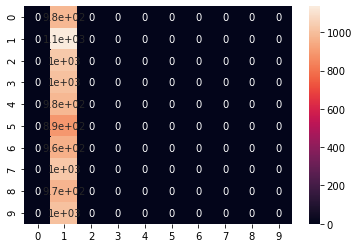

In [22]:
import seaborn as sn
sn.heatmap(cm1,annot=True)

<AxesSubplot:>

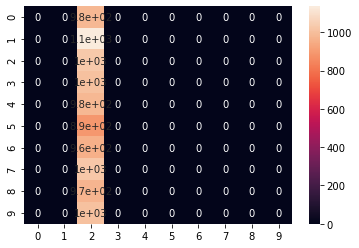

In [23]:
sn.heatmap(cm2,annot=True)

<AxesSubplot:>

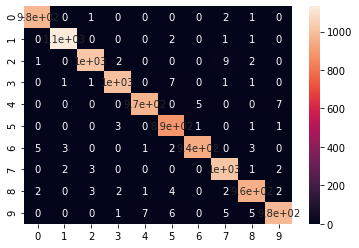

In [24]:
sn.heatmap(cm3,annot=True)

<AxesSubplot:>

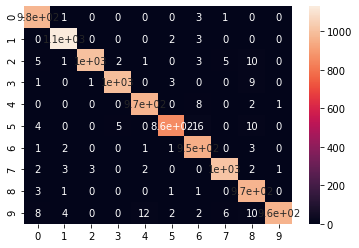

In [25]:
sn.heatmap(cm4,annot=True)

<AxesSubplot:>

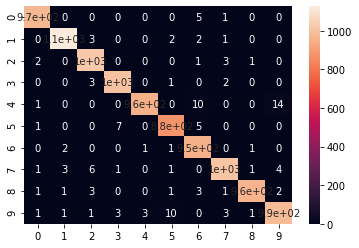

In [26]:
sn.heatmap(cm5,annot=True)

In [9]:
#create a custom color map
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","magenta","yellow"])

### Generate data

In [14]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


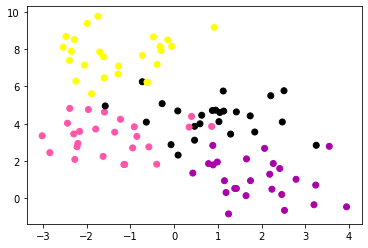

In [13]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.savefig("temp.jpg",dpi=1000)
plt.show()


In [31]:
plt.style.use("ggplot")
labels_orig = labels
labels = np.mod(labels_orig, 2)

### Spliting and encoding data

In [32]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels_orig, stratify=labels_orig, random_state=0)
print(X_train.shape, X_val.shape, labels_orig.shape)
enc = OneHotEncoder()
# 0 -> (1, 0, 0, 0), 1 -> (0, 1, 0, 0), 2 -> (0, 0, 1, 0), 3 -> (0, 0, 0, 1)
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)

(750, 2) (250, 2) (1000,)
(750, 4) (250, 4)


### FeedForward Network

In [15]:
class FFNetwork:
  
  def __init__(self, init_method = 'random', activation_function = 'sigmoid', leaky_slope = 0.1):
        
    self.params={}
    self.params_h = []
    self.num_layers=2
    self.layer_sizes = [2, 2, 4]
    self.activation_function = activation_function
    self.leaky_slope = leaky_slope
    
    np.random.seed(0)
    
    if init_method == "random":
      for i in range(1,self.num_layers+1):
        self.params["W"+str(i)] = np.random.randn(self.layer_sizes[i-1],self.layer_sizes[i])
        self.params["B"+str(i)] = np.random.randn(1,self.layer_sizes[i])
        
    elif init_method == "he":
      for i in range(1,self.num_layers+1):
        self.params["W"+str(i)] = np.random.randn(self.layer_sizes[i-1],self.layer_sizes[i])*np.sqrt(2/self.layer_sizes[i-1])
        self.params["B"+str(i)] = np.random.randn(1,self.layer_sizes[i])
        
    elif init_method == "xavier":
      for i in range(1,self.num_layers+1):
        self.params["W"+str(i)]=np.random.randn(self.layer_sizes[i-1],self.layer_sizes[i])*np.sqrt(1/self.layer_sizes[i-1])
        self.params["B"+str(i)]=np.random.randn(1,self.layer_sizes[i])
        
    elif init_method == "zeros":
      for i in range(1,self.num_layers+1):
        self.params["W"+str(i)]=np.zeros((self.layer_sizes[i-1],self.layer_sizes[i]))
        self.params["B"+str(i)]=np.zeros((1,self.layer_sizes[i]))
    
    self.gradients={}
    self.update_params={}
    self.prev_update_params={}
    for i in range(1,self.num_layers+1):
      self.update_params["v_w"+str(i)]=0
      self.update_params["v_b"+str(i)]=0
      self.update_params["m_b"+str(i)]=0
      self.update_params["m_w"+str(i)]=0
      self.prev_update_params["v_w"+str(i)]=0
      self.prev_update_params["v_b"+str(i)]=0
  
  def forward_activation(self, X): 
    if self.activation_function == "sigmoid":
      return 1.0/(1.0 + np.exp(-X))
    elif self.activation_function == "tanh":
      return np.tanh(X)
    elif self.activation_function == "relu":
      return np.maximum(0,X)
    elif self.activation_function == "leaky_relu":
      return np.maximum(self.leaky_slope*X,X)
      
  def grad_activation(self, X):
    if self.activation_function == "sigmoid":
      return X*(1-X) 
    elif self.activation_function == "tanh":
      return (1-np.square(X))
    elif self.activation_function == "relu":
      return 1.0*(X>0)
    elif self.activation_function == "leaky_relu":
      d=np.zeros_like(X)
      d[X<=0]=self.leaky_slope
      d[X>0]=1
      return d

  def softmax(self, X):
    exps = np.exp(X)
    return exps / np.sum(exps, axis=1).reshape(-1,1)
  
  def forward_pass(self, X, params = None):
    if params is None:
        params = self.params
    self.A1 = np.matmul(X, params["W1"]) + params["B1"] # (N, 2) * (2, 2) -> (N, 2)
    self.H1 = self.forward_activation(self.A1) # (N, 2)
    self.A2 = np.matmul(self.H1, params["W2"]) + params["B2"] # (N, 2) * (2, 4) -> (N, 4)
    self.H2 = self.softmax(self.A2) # (N, 4)
    return self.H2
  
  def grad(self, X, Y, params = None):
    if params is None:
      params = self.params 
      
    self.forward_pass(X, params)
    m = X.shape[0]
    self.gradients["dA2"] = self.H2 - Y # (N, 4) - (N, 4) -> (N, 4)
    self.gradients["dW2"] = np.matmul(self.H1.T, self.gradients["dA2"]) # (2, N) * (N, 4) -> (2, 4)
    self.gradients["dB2"] = np.sum(self.gradients["dA2"], axis=0).reshape(1, -1) # (N, 4) -> (1, 4)
    self.gradients["dH1"] = np.matmul(self.gradients["dA2"], params["W2"].T) # (N, 4) * (4, 2) -> (N, 2)
    self.gradients["dA1"] = np.multiply(self.gradients["dH1"], self.grad_activation(self.H1)) # (N, 2) .* (N, 2) -> (N, 2)
    self.gradients["dW1"] = np.matmul(X.T, self.gradients["dA1"]) # (2, N) * (N, 2) -> (2, 2)
    self.gradients["dB1"] = np.sum(self.gradients["dA1"], axis=0).reshape(1, -1) # (N, 2) -> (1, 2)
    
  def fit(self, X, Y, epochs=1, algo= "GD", display_loss=False, 
          eta=1, mini_batch_size=100, eps=1e-8,  
          beta=0.9, beta1=0.9, beta2=0.9, gamma=0.9 ):
      
    if display_loss:
      loss = {}
      Y_pred = self.predict(X)
      loss[0] = log_loss(np.argmax(Y, axis=1), Y_pred)

    for num_epoch in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      m = X.shape[0]
      
      if algo == "GD":
        self.grad(X, Y)
        for i in range(1,self.num_layers+1):
          self.params["W"+str(i)] -= eta * (self.gradients["dW"+str(i)]/m)
          self.params["B"+str(i)] -= eta * (self.gradients["dB"+str(i)]/m)
          
      elif algo == "MiniBatch":
        for k in range(0,m,mini_batch_size):
          self.grad(X[k:k+mini_batch_size], Y[k:k+mini_batch_size])
          for i in range(1,self.num_layers+1):
            self.params["W"+str(i)] -= eta * (self.gradients["dW"+str(i)]/mini_batch_size)
            self.params["B"+str(i)] -= eta * (self.gradients["dB"+str(i)]/mini_batch_size)
            
      elif algo == "Momentum":
        self.grad(X, Y)
        for i in range(1,self.num_layers+1):
          self.update_params["v_w"+str(i)] = gamma *self.update_params["v_w"+str(i)] + eta * (self.gradients["dW"+str(i)]/m)
          self.update_params["v_b"+str(i)] = gamma *self.update_params["v_b"+str(i)] + eta * (self.gradients["dB"+str(i)]/m)
          self.params["W"+str(i)] -= self.update_params["v_w"+str(i)]
          self.params["B"+str(i)] -= self.update_params["v_b"+str(i)]  
          
      elif algo == "NAG":
        temp_params = {}
        for i in range(1,self.num_layers+1):
          self.update_params["v_w"+str(i)]=gamma*self.prev_update_params["v_w"+str(i)]
          self.update_params["v_b"+str(i)]=gamma*self.prev_update_params["v_b"+str(i)]
          temp_params["W"+str(i)]=self.params["W"+str(i)]-self.update_params["v_w"+str(i)]
          temp_params["B"+str(i)]=self.params["B"+str(i)]-self.update_params["v_b"+str(i)]
        self.grad(X,Y,temp_params)
        for i in range(1,self.num_layers+1):
          self.update_params["v_w"+str(i)] = gamma *self.update_params["v_w"+str(i)] + eta * (self.gradients["dW"+str(i)]/m)
          self.update_params["v_b"+str(i)] = gamma *self.update_params["v_b"+str(i)] + eta * (self.gradients["dB"+str(i)]/m)
          self.params["W"+str(i)] -= eta * (self.update_params["v_w"+str(i)])
          self.params["B"+str(i)] -= eta * (self.update_params["v_b"+str(i)]) 
        self.prev_update_params=self.update_params 
        
      elif algo == "AdaGrad":
        self.grad(X, Y)
        for i in range(1,self.num_layers+1):
          self.update_params["v_w"+str(i)] += (self.gradients["dW"+str(i)]/m)**2
          self.update_params["v_b"+str(i)] += (self.gradients["dB"+str(i)]/m)**2
          self.params["W"+str(i)] -= (eta/(np.sqrt(self.update_params["v_w"+str(i)])+eps)) * (self.gradients["dW"+str(i)]/m)
          self.params["B"+str(i)] -= (eta/(np.sqrt(self.update_params["v_b"+str(i)])+eps)) * (self.gradients["dB"+str(i)]/m)
      
      elif algo == "RMSProp":
        self.grad(X, Y)
        for i in range(1,self.num_layers+1):
          self.update_params["v_w"+str(i)] = beta*self.update_params["v_w"+str(i)] +(1-beta)*((self.gradients["dW"+str(i)]/m)**2)
          self.update_params["v_b"+str(i)] = beta*self.update_params["v_b"+str(i)] +(1-beta)*((self.gradients["dB"+str(i)]/m)**2)
          self.params["W"+str(i)] -= (eta/(np.sqrt(self.update_params["v_w"+str(i)]+eps)))*(self.gradients["dW"+str(i)]/m)
          self.params["B"+str(i)] -= (eta/(np.sqrt(self.update_params["v_b"+str(i)]+eps)))*(self.gradients["dB"+str(i)]/m)
      
      elif algo == "Adam":
        self.grad(X, Y)
        num_updates=0
        for i in range(1,self.num_layers+1):
          num_updates+=1
          self.update_params["m_w"+str(i)]=beta1*self.update_params["m_w"+str(i)]+(1-beta1)*(self.gradients["dW"+str(i)]/m)
          self.update_params["v_w"+str(i)]=beta2*self.update_params["v_w"+str(i)]+(1-beta2)*((self.gradients["dW"+str(i)]/m)**2)
          m_w_hat=self.update_params["m_w"+str(i)]/(1-np.power(beta1,num_updates))
          v_w_hat=self.update_params["v_w"+str(i)]/(1-np.power(beta2,num_updates))
          self.params["W"+str(i)] -=(eta/np.sqrt(v_w_hat+eps))*m_w_hat
          
          self.update_params["m_b"+str(i)]=beta1*self.update_params["m_b"+str(i)]+(1-beta1)*(self.gradients["dB"+str(i)]/m)
          self.update_params["v_b"+str(i)]=beta2*self.update_params["v_b"+str(i)]+(1-beta2)*((self.gradients["dB"+str(i)]/m)**2)
          m_b_hat=self.update_params["m_b"+str(i)]/(1-np.power(beta1,num_updates))
          v_b_hat=self.update_params["v_b"+str(i)]/(1-np.power(beta2,num_updates))
          self.params["B"+str(i)] -=(eta/np.sqrt(v_b_hat+eps))*m_b_hat
          
      if display_loss:
        Y_pred = self.predict(X)
        loss[num_epoch+1] = log_loss(np.argmax(Y, axis=1), Y_pred)
        self.params_h.append(np.concatenate((self.params['W1'].ravel(), self.params['W2'].ravel(), self.params['B1'].ravel(), self.params['B2'].ravel())))
    
    if display_loss:
      plt.plot(loss.values(), '-o', markersize=5)
      plt.xlabel('Epochs')
      plt.ylabel('Log Loss')
      plt.show()
      
  
  def predict(self, X):
    Y_pred = self.forward_pass(X)
    return np.array(Y_pred).squeeze()
def post_process(scatter_plot=False, gradient_plot=True, plot_scale=0.1):    
    Y_pred_train = model.predict(X_train)
    Y_pred_train = np.argmax(Y_pred_train,1)
    Y_pred_val = model.predict(X_val)
    Y_pred_val = np.argmax(Y_pred_val,1)
    accuracy_train = accuracy_score(Y_pred_train, Y_train)
    accuracy_val = accuracy_score(Y_pred_val, Y_val)
    print("Training accuracy", round(accuracy_train, 4))
    print("Validation accuracy", round(accuracy_val, 4))    
    
    if scatter_plot:
      plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap=my_cmap, s=15*(np.abs(np.sign(Y_pred_train-Y_train))+.1))
      plt.show()
      
    if gradient_plot:
      h = np.asarray(model.params_h)
      h_diff = (h[0:-1, :] - h[1:, :])
      for i in range(18):
        plt.subplot(6, 3, i+1)
        plt.plot(h_diff[:, i], '-')
        plt.ylim((-plot_scale, plot_scale))
        plt.yticks([])
        plt.xticks([])
      plt.show()

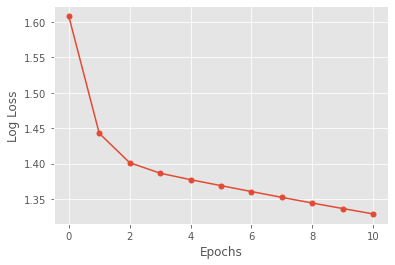

Training accuracy 0.376
Validation accuracy 0.384


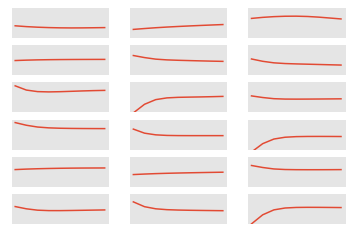

In [34]:
model = FFNetwork(init_method='xavier', activation_function='sigmoid')
model.fit(X_train, y_OH_train, epochs=10, eta=1, algo="GD", display_loss=True)
post_process()

zeros sigmoid


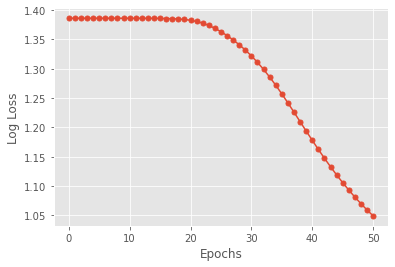

Training accuracy 0.528
Validation accuracy 0.54


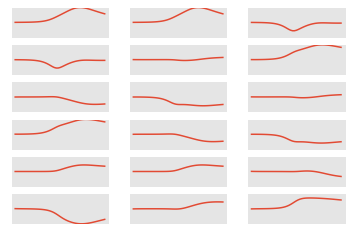


--

random sigmoid


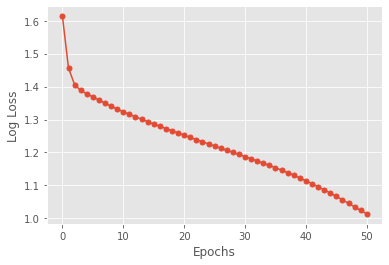

Training accuracy 0.5827
Validation accuracy 0.568


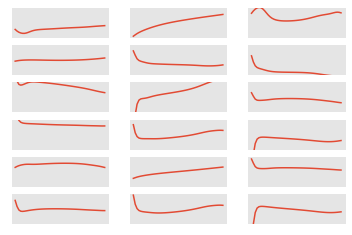


--

xavier sigmoid


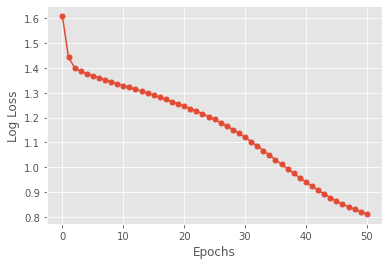

Training accuracy 0.8747
Validation accuracy 0.88


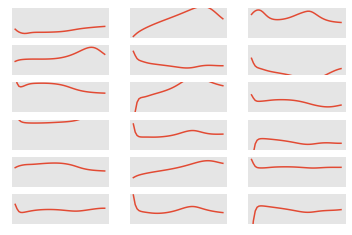


--

he sigmoid


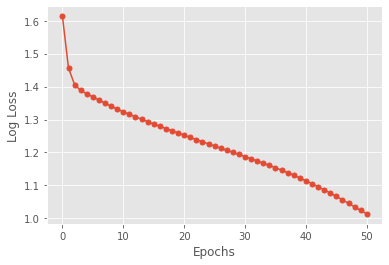

Training accuracy 0.5827
Validation accuracy 0.568


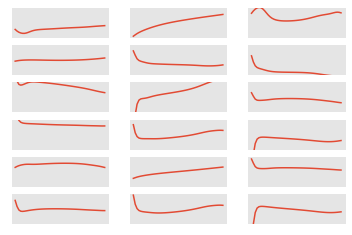


--



In [35]:
for init_method in ['zeros', 'random', 'xavier', 'he']:
      for activation_function in ['sigmoid']:
        print(init_method, activation_function)
        model = FFNetwork(init_method=init_method, activation_function=activation_function)
        model.fit(X_train, y_OH_train, epochs=50, eta=1, algo="GD", display_loss=True)
        post_process(plot_scale=0.05)
        print('\n--\n')

zeros tanh


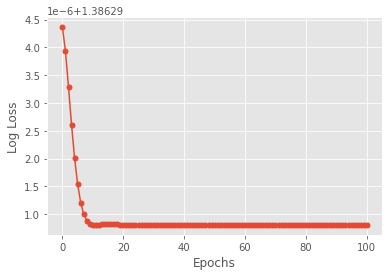

Training accuracy 0.2507
Validation accuracy 0.248


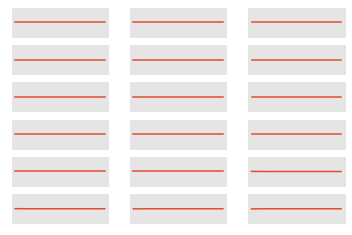


--

random tanh


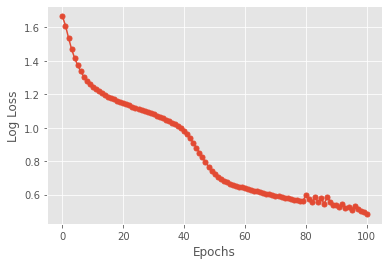

Training accuracy 0.8547
Validation accuracy 0.86


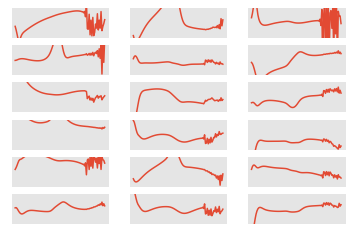


--

xavier tanh


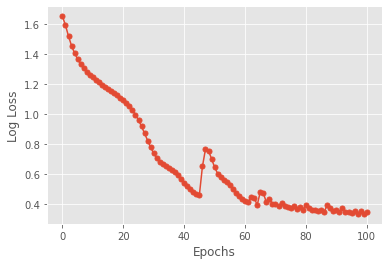

Training accuracy 0.88
Validation accuracy 0.88


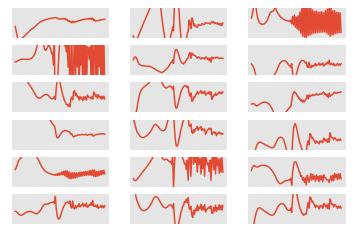


--

he tanh


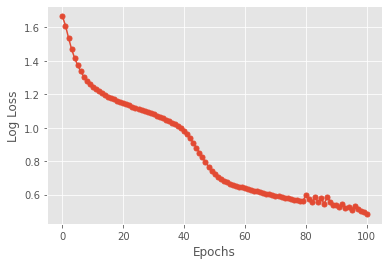

Training accuracy 0.8547
Validation accuracy 0.86


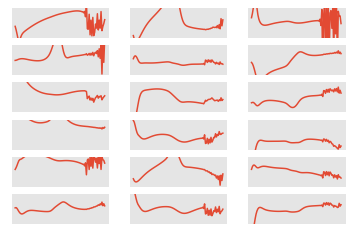


--



In [36]:
for init_method in ['zeros', 'random', 'xavier', 'he']:
      for activation_function in ['tanh']:
        print(init_method, activation_function)
        model = FFNetwork(init_method=init_method, activation_function=activation_function)
        model.fit(X_train, y_OH_train, epochs=100, eta=0.5, algo="NAG", display_loss=True)
        post_process(plot_scale=0.05)
        print('\n--\n')

zeros relu


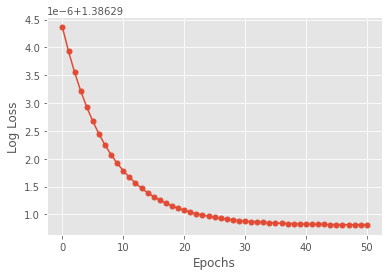

Training accuracy 0.2507
Validation accuracy 0.248


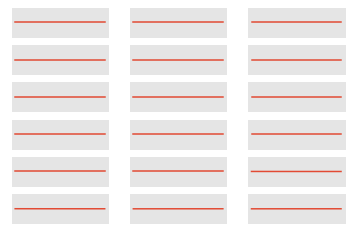


--

random relu


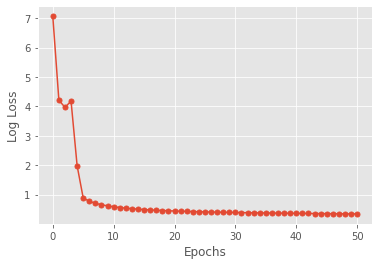

Training accuracy 0.9067
Validation accuracy 0.92


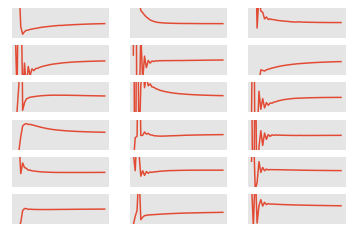


--

xavier relu


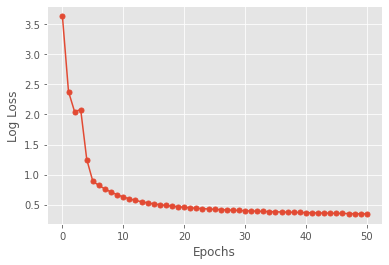

Training accuracy 0.9053
Validation accuracy 0.924


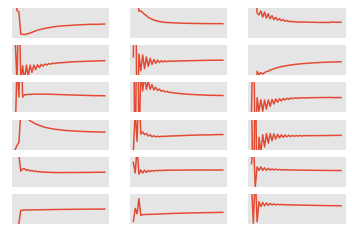


--

he relu


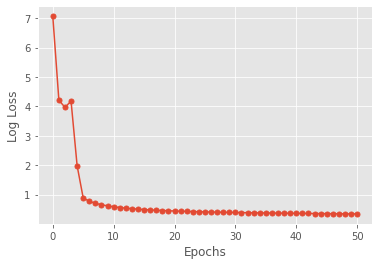

Training accuracy 0.9067
Validation accuracy 0.92


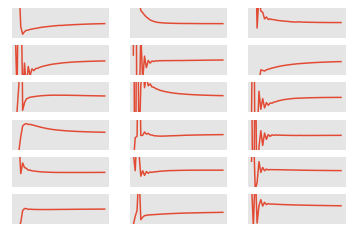


--



In [37]:
for init_method in ['zeros', 'random', 'xavier', 'he']:
      for activation_function in ['relu']:
        print(init_method, activation_function)
        model = FFNetwork(init_method=init_method, activation_function=activation_function)
        model.fit(X_train, y_OH_train, epochs=50, eta=0.25, algo="GD", display_loss=True)
        post_process(plot_scale=0.05)
        print('\n--\n')

zeros leaky_relu


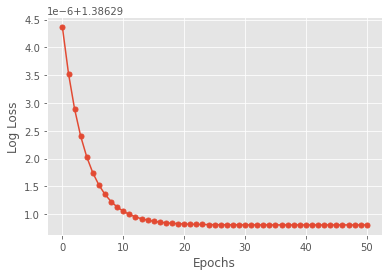

Training accuracy 0.2507
Validation accuracy 0.248


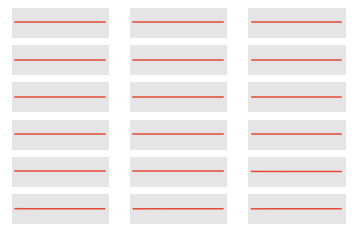


--

random leaky_relu


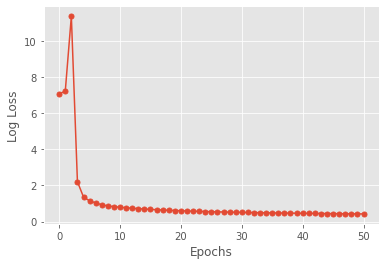

Training accuracy 0.8933
Validation accuracy 0.9


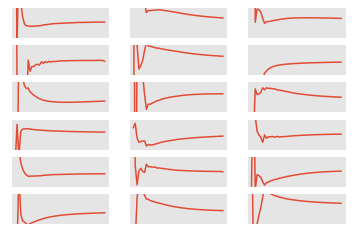


--

xavier leaky_relu


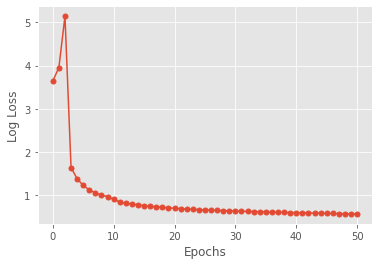

Training accuracy 0.8027
Validation accuracy 0.812


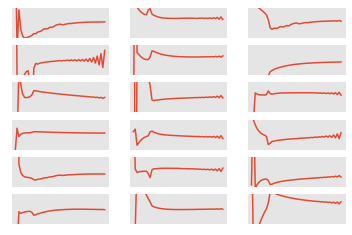


--

he leaky_relu


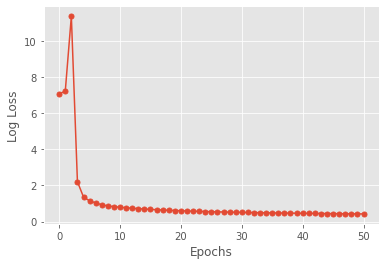

Training accuracy 0.8933
Validation accuracy 0.9


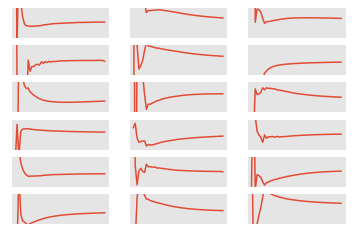


--



In [38]:
for init_method in ['zeros', 'random', 'xavier', 'he']:
      for activation_function in ['leaky_relu']:
        print(init_method, activation_function)
        model = FFNetwork(init_method=init_method, activation_function=activation_function, leaky_slope=0.1)
        model.fit(X_train, y_OH_train, epochs=50, eta=0.5, algo="GD", display_loss=True)
        post_process(plot_scale=0.05)
        print('\n--\n')